In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Cleaned_Spotify.csv")
df.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,1,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,2,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,3,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,4,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928,0.0926,108.003,0.7200,1928
4,5,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [3]:
df.drop(["id","artists","name","year"],axis=1,inplace=True)#Removing textual columns/data

In [4]:
df = df.iloc[: , 1:]#Removing index column as it is of no use
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165711 entries, 0 to 165710
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      165711 non-null  float64
 1   danceability      165711 non-null  float64
 2   duration_ms       165711 non-null  int64  
 3   energy            165711 non-null  float64
 4   explicit          165711 non-null  int64  
 5   instrumentalness  165711 non-null  float64
 6   key               165711 non-null  int64  
 7   liveness          165711 non-null  float64
 8   loudness          165711 non-null  float64
 9   mode              165711 non-null  int64  
 10  popularity        165711 non-null  int64  
 11  release_date      165711 non-null  int64  
 12  speechiness       165711 non-null  float64
 13  tempo             165711 non-null  float64
 14  valence           165711 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 19.0 MB


In [5]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence
count,165711.000000,165711.000000,1.657110e+05,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000
mean,0.492981,0.536652,2.330355e+05,0.493680,0.074431,0.164365,5.201405,0.205676,-11.262813,0.709796,32.058687,1977.840976,0.084475,117.054982,0.531604
std,0.376984,0.175685,1.216101e+05,0.267003,0.262471,0.311035,3.508201,0.176947,5.629660,0.453858,21.404763,25.326058,0.120758,30.717050,0.263759
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,1921.000000,0.000000,0.000000,0.000000
25%,0.092900,0.415000,1.724000e+05,0.270000,0.000000,0.000000,2.000000,0.098000,-14.273000,0.000000,14.000000,1958.000000,0.034900,93.693000,0.320000
50%,0.493000,0.546000,2.097600e+05,0.488000,0.000000,0.000232,5.000000,0.134000,-10.376000,1.000000,34.000000,1979.000000,0.044800,114.908000,0.543000
75%,0.888000,0.665000,2.642000e+05,0.714000,0.000000,0.095400,8.000000,0.260000,-7.063000,1.000000,48.000000,1999.000000,0.073400,135.846000,0.752000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,2020.000000,0.968000,244.091000,1.000000


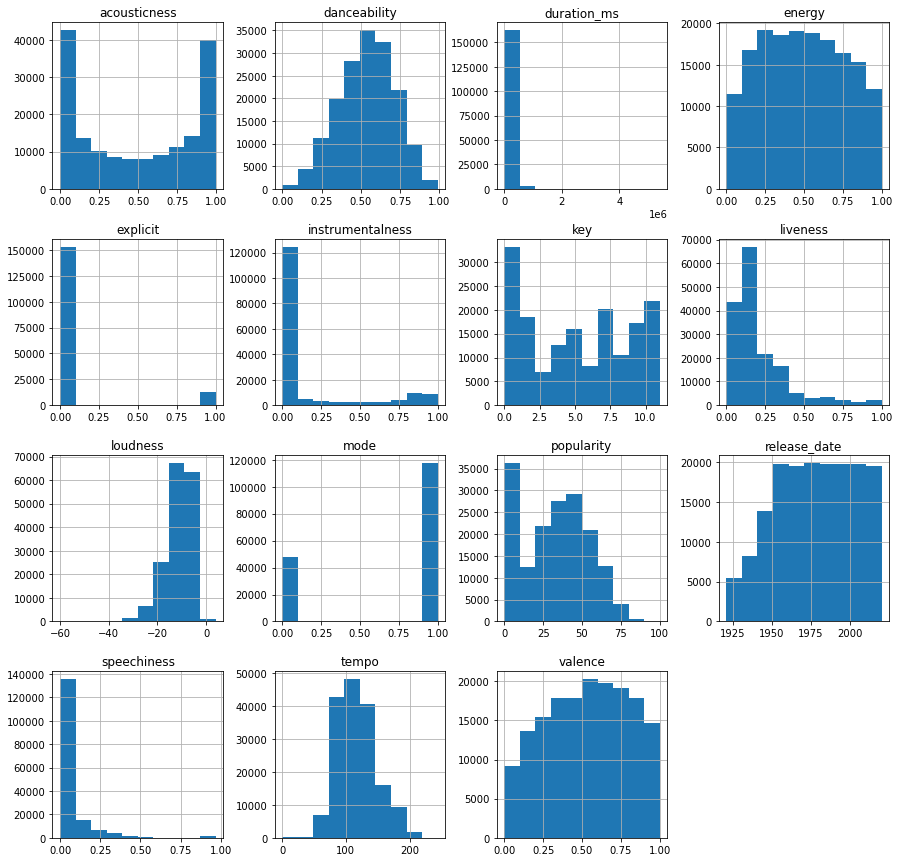

In [6]:
df.hist(figsize=(15, 15))
plt.show()

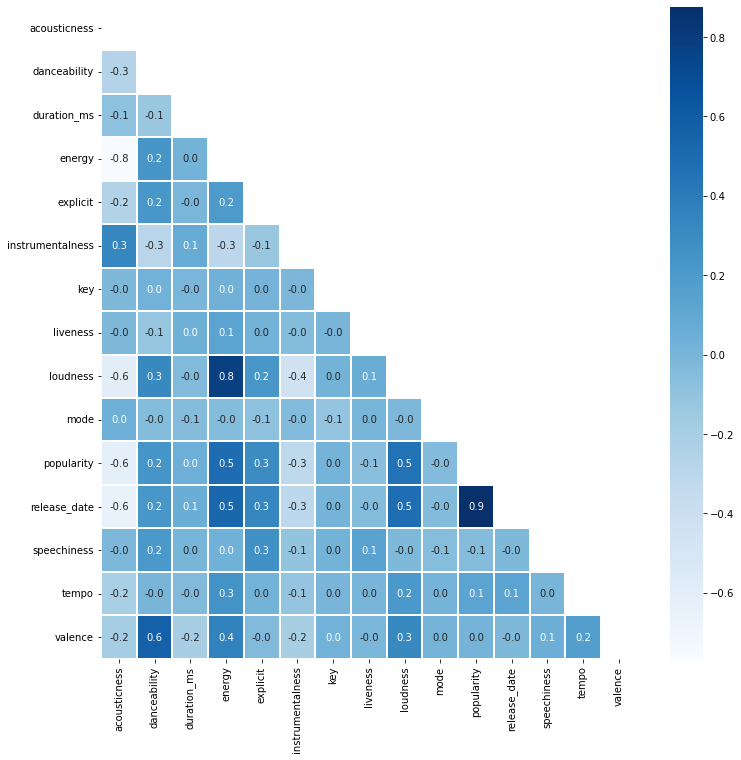

In [7]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

'''
Takeaways -
1. danceability and valence - Medium Positive Correlation. 0.6
2. loudness and energy - High Positive Correlation. 0.8
3. accousticness has negative correlation with energy, loudness, popularity and release date.
4. popularity is highly positively correlated with release date. 0.9 
5. loudness and energy have positive medium correlation with popularity.
'''

In [8]:
df['popularity_bi'] = [1 if x >=50  else 0 for x in df['popularity']] # 50
#df['popularity_multi'] = [2 if x >= 50 else 1 if x >= 35 else 0 for x in df['popularity']]

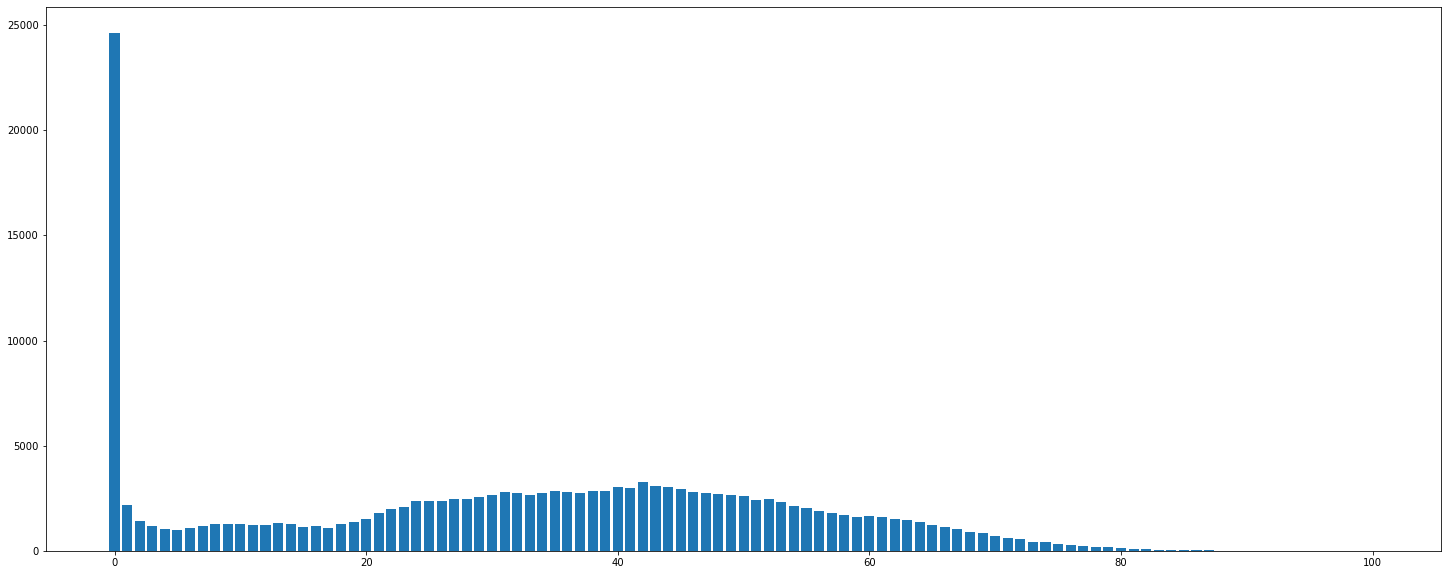

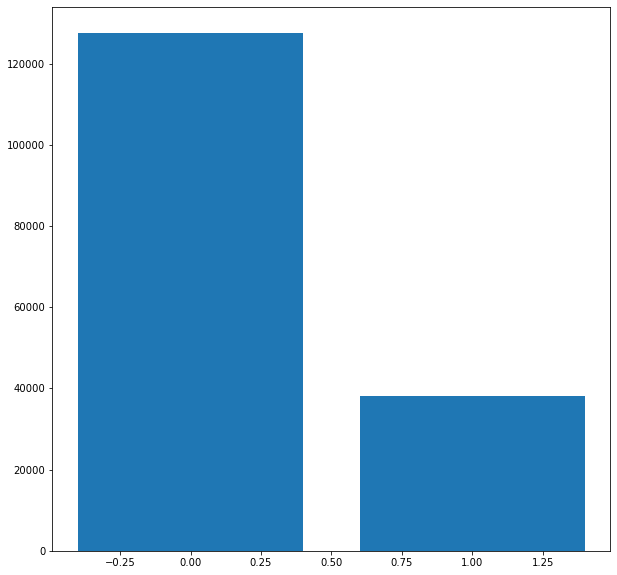

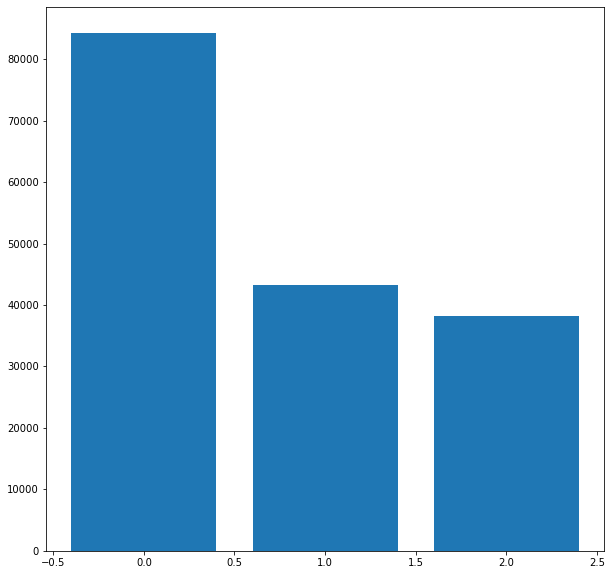

In [9]:

popularity = pd.DataFrame(df[['popularity']].value_counts())
popularity.reset_index(inplace=True)
popularity = popularity.rename(columns = {'index':'popularity', 0:"count"})

popularity_bi = pd.DataFrame(df[['popularity_bi']].value_counts())
popularity_bi.reset_index(inplace=True)
popularity_bi = popularity_bi.rename(columns = {'index':'popularity_bi', 0:"count"})

# popularity_multi = pd.DataFrame(df[['popularity_multi']].value_counts())
# popularity_multi.reset_index(inplace=True)
# popularity_multi = popularity_multi.rename(columns = {'index':'popularity_multi', 0:"count"})


plt.figure(figsize=(25,10))
plt.bar(popularity['popularity'],popularity['count'])
plt.show()

plt.figure(figsize=(10,10))
plt.bar(popularity_bi['popularity_bi'],popularity_bi['count'])
plt.show()

# plt.figure(figsize=(10,10))
# plt.bar(popularity_multi['popularity_multi'],popularity_multi['count'])
# plt.show()

In [10]:
df_target = df[["popularity","popularity_bi",'popularity_multi']]
print(df_target.shape)

df_data=df[['duration_ms','loudness','tempo',"acousticness","danceability","release_date","mode","key","energy","explicit","instrumentalness","liveness","speechiness","valence"]]
print(df_data.shape)
df_data.describe()

(165711, 3)
(165711, 14)


,duration_ms,loudness,tempo,acousticness,danceability,release_date,mode,key,energy,explicit,instrumentalness,liveness,speechiness,valence
count,1.657110e+05,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000
mean,2.330355e+05,-11.262813,117.054982,0.492981,0.536652,1977.840976,0.709796,5.201405,0.493680,0.074431,0.164365,0.205676,0.084475,0.531604
std,1.216101e+05,5.629660,30.717050,0.376984,0.175685,25.326058,0.453858,3.508201,0.267003,0.262471,0.311035,0.176947,0.120758,0.263759
min,5.108000e+03,-60.000000,0.000000,0.000000,0.000000,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.724000e+05,-14.273000,93.693000,0.092900,0.415000,1958.000000,0.000000,2.000000,0.270000,0.000000,0.000000,0.098000,0.034900,0.320000
50%,2.097600e+05,-10.376000,114.908000,0.493000,0.546000,1979.000000,1.000000,5.000000,0.488000,0.000000,0.000232,0.134000,0.044800,0.543000
75%,2.642000e+05,-7.063000,135.846000,0.888000,0.665000,1999.000000,1.000000,8.000000,0.714000,0.000000,0.095400,0.260000,0.073400,0.752000
max,5.403500e+06,3.855000,244.091000,0.996000,0.988000,2020.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,0.968000,1.000000


In [11]:
# Splitting Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_data,df_target["popularity_bi"] , random_state = 42, test_size= 0.30)

# x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(df_data,df_target["popularity_multi"] , random_state = 42, test_size= 0.40)


In [12]:
#Decision Tree without any modifications. we can clearly see it overfits 
tree_complete = DecisionTreeClassifier(random_state = 0)
tree_complete.fit(x_train, y_train)


DecisionTreeClassifier(random_state=0)

In [13]:
tree_complete.feature_importances_

array([0.05307852, 0.05382476, 0.05453035, 0.04666258, 0.04842968,
       0.47710238, 0.00477463, 0.02477514, 0.04496732, 0.00287298,
       0.03842887, 0.05093335, 0.05013056, 0.04948889])

In [14]:
tree_complete.score(x_test, y_test), tree_complete.score(x_train, y_train) #overfitting

(0.8063121052419842, 0.9974999353431554)

In [15]:
from sklearn import tree
print(tree.export_text(tree_complete))

|--- feature_5 <= 2004.50
|   |--- feature_5 <= 1990.50
|   |   |--- feature_5 <= 1965.50
|   |   |   |--- feature_5 <= 1957.50
|   |   |   |   |--- feature_5 <= 1955.50
|   |   |   |   |   |--- feature_5 <= 1953.50
|   |   |   |   |   |   |--- feature_12 <= 0.03
|   |   |   |   |   |   |   |--- feature_5 <= 1952.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_5 >  1952.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.23
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_4 >  0.23
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_12 >  0.03
|   |   |   |   |   |   |   |--- feature_8 <= 0.02
|   |   |   |   |   |   |   |   |--- feature_8 <= 0.02
|   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- feature_13 <= 0.04
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   

## Note: Running below code might take alot of time depending on your machine. I have randomly tried alot of combinations to arrive at best parameters and in succesfully running gridsearchcv

In [16]:
# GridSearch + CV # making it bigger takes long processing time
# from sklearn.model_selection import GridSearchCV

# opt_tree = DecisionTreeClassifier(random_state = 0)

# dt_params = {'max_depth':  [2,5,7,9,11,15]         ,
#              'min_samples_split':   range(1,3),
#              'max_features': ['sqrt', 'auto', 'log2', 0.3,0.5,0.7,0.9],
#              'max_leaf_nodes':    [5,20,40,80,120,160,200]   }

# # 9 for depth, 10 for sample, 10 for leaf

# grid_tree = GridSearchCV(opt_tree, dt_params, cv=5)

In [17]:
#grid_tree.best_params_

Notes:

    1. I tried pre pruning tree but it is not significanlty improving our model as our model doesn't overfits. 
    Usually we do pre pruning to avoid overfitting problem and thus we don't require it in our case. 
    
    2. Using gridsearch is computationally heavy process and thus takes a long time, so i tried using subset of data or
    using hit and trial method to interchange a set of values in parameters so that my gridsearch doesn't runs indefinitely.
    
    3. Sometimes even with pre pruning our model overfits.
    
    4. I am using post pruning which is significantly improving our model.
    
    

In [18]:
#Case 1:
tree_complete = DecisionTreeClassifier(random_state = 0,ccp_alpha= 0.0001, max_leaf_nodes= 80, min_samples_split= 2, max_features= .9)

tree_complete.fit(x_train, y_train)
tree_complete.score(x_test, y_test), tree_complete.score(x_train, y_train)

(0.8682061391157421, 0.864591325637732)

In [19]:
# Run this if you want to see the tree
# from sklearn import tree
# print(tree.export_text(tree_complete))

In [20]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
y_test_pred = tree_complete.predict(x_test)
logreg_matrix = confusion_matrix(y_test, y_test_pred)
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.7966351467518114
Recall score: 0.5698849161029605
Accuracy score: 0.8682061391157421
F1 score: 0.6644474034620506


##### Tried RandomForestRegressor but is computationally heavy and thus decision tree is better suited to us.

#### Moreover parameter tuning isn't helping us to improve performac in case of RandomForestRegressor

In [21]:
# # GridSearch + CV # making it bigger takes long processing time
# from sklearn.ensemble import RandomForestRegressor

# rdm_tree = RandomForestRegressor(random_state = 0)

# dt_params = {'max_depth':  [None,2,5,7,9,11,15]         ,
#              'min_samples_split':   range(1,3),
#              'n_estimators':[10, 50, 100, 150, 200],
#              'max_features': ['sqrt', 'auto', 'log2', 0.3,0.5,0.7],
#              'min_samples_leaf':[1],
#              'min_samples_split': [2],
#              'max_leaf_nodes':    [5,20,40,80,120,160,200]   }

# # 9 for depth, 10 for sample, 10 for leaf

# rd_tree = GridSearchCV(rdm_tree, dt_params, cv=4,verbose=5, n_jobs=-1)

# rd_tree.fit(x_train, y_train)

In [ ]:
#grid_tree.best_params_

In [70]:
# from sklearn.ensemble import RandomForestRegressor
# x_train, x_test, y_train, y_test = train_test_split(df_data,df_target["popularity_bi"] , random_state = 42, test_size= 0.30)
# tree_complete = RandomForestRegressor( max_depth=None, max_features= "auto",random_state=0, n_estimators= 5, min_samples_leaf=1, min_samples_split=2, max_leaf_nodes=780)

# tree_complete.fit(x_train, y_train)
# tree_complete.score(x_test, y_test), tree_complete.score(x_train, y_train)

(0.4497411913713075, 0.5590584846277346)